## PCA using Sklearn

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#read iris csv
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [93]:
#prepare the data
x = data.iloc[:,1:5]
 
#prepare the target
target = data.iloc[:,5]

scale = StandardScaler()
data = scale.fit_transform(x.values)

In [94]:
data.shape

(150, 4)

In [97]:
pca = PCA(n_components = 2)

#scaling dengan sklearn standardScaler
pca_components = pca.fit_transform(data)
print(pca_components.shape)

(150, 2)


In [98]:
new_df_pca = pd.DataFrame(np.hstack((pca_components, np.array(target).reshape(-1,1))),
                          columns = ['1st component', '2nd component', 'Species'])


In [99]:
new_df_pca.head()

,1st component,2nd component,Species
0,-2.26454,0.505704,Iris-setosa
1,-2.08643,-0.655405,Iris-setosa
2,-2.36795,-0.318477,Iris-setosa
3,-2.3042,-0.575368,Iris-setosa
4,-2.38878,0.674767,Iris-setosa


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


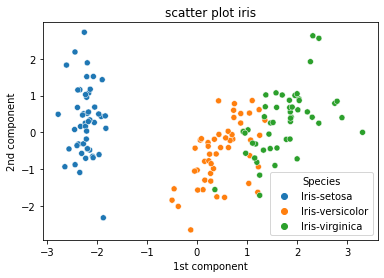

In [102]:
#plotting data
sns.scatterplot(new_df_pca['1st component'], new_df_pca['2nd component'],
               hue = new_df_pca['Species'], cmap = 'plasma')
plt.title('scatter plot iris')
plt.show()

In [103]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

ValueError: shape mismatch: objects cannot be broadcast to a single shape

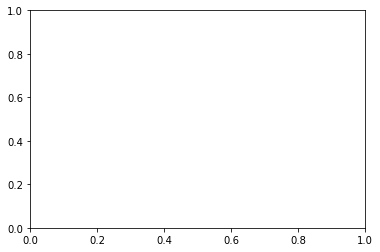

In [104]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals = 2)
columns = ['PC1', 'PC2', 'PC3', 'PC4']
plt.bar(x= range(1,5), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [105]:
eig_val = pca.explained_variance_
total = sum(eig_val)
var_exp = [(i / total)*100 for i in sorted(eig_val, reverse=True)]

ValueError: shape mismatch: objects cannot be broadcast to a single shape

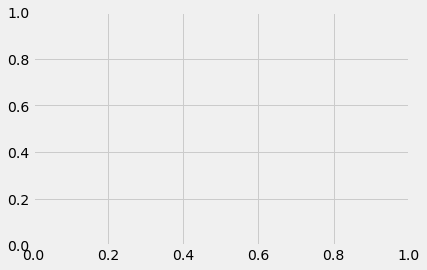

In [106]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(4), var_exp, alpha=0.5, align='center', label='explained variance')
    plt.ylabel('Variance percentage')
    plt.xlabel('Principal components')
    plt.ylim(0,100)
    plt.legend(loc='best')
    plt.tight_layout()